# Praca domowa 4
Klaudia Gruszkowska

In [44]:
#wczytanie pakietów
import pandas as pd
import matplotlib.pyplot as plt

## Zbiory danych

### Apartments

In [45]:
apartments  = pd.read_csv("apartments.csv")

In [46]:
apartments

,m2.price,construction.year,surface,floor,no.rooms,district
0,5897,1953,25,3,1,Srodmiescie
1,1818,1992,143,9,5,Bielany
2,3643,1937,56,1,2,Praga
3,3517,1995,93,7,3,Ochota
4,3013,1992,144,6,5,Mokotow
...,...,...,...,...,...,...
995,6355,1921,44,2,2,Srodmiescie
996,3422,1921,48,10,2,Bemowo
997,3098,1980,85,3,3,Bemowo
998,4192,1942,36,7,1,Zoliborz


Omawiany zbiór składa się z 5 zmiennych numerycznych i jedej ("district'), która jest zmienną kategoryczną. W tym zadaniu chcemy otrzymać predykcję zmiennej m2.price czyli ceny za mektr kwadratowy powieszchni mieszkania w Warszawie. Jest to więc zadanie regresji.

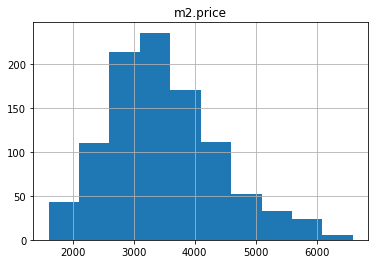

In [47]:
m2_price=apartments['m2.price']
m2_price.hist()
plt.title("m2.price")
plt.show()

Zmienna celu  jest trochę pochylona w kierunku mniejszych wartości.

In [48]:
apartments['district'].value_counts()

Mokotow        107
Wola           106
Ursus          105
Ursynow        103
Srodmiescie    100
Bemowo          98
Zoliborz        97
Ochota          96
Bielany         96
Praga           92
Name: district, dtype: int64

Powyżej wypisana jest ilość obserwacji dla poszczególnych wartości zmiennej kategorycznej ('district'). Widać, że dane są zbalansowane a samych wartości nie jest dużo (10) dlatego będziemy mogli wykorzystać później one-hot encoding.

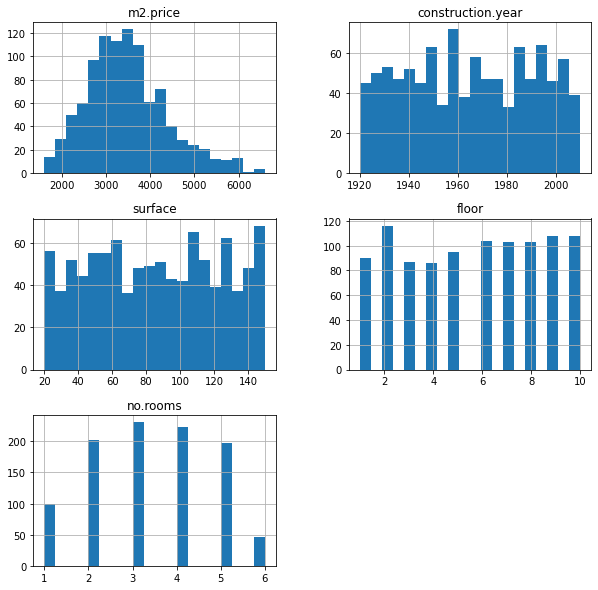

In [49]:
apartments.hist(figsize = (10,10),bins = 20)
plt.show()

Poza zmienną celu (co opisane wyżej) wszystkie zmienne numeryczne mają rozkłady dalekie od rozkładu normalnego. 

In [50]:
from category_encoders import OneHotEncoder
encoder=OneHotEncoder(cols=['district'])
apartments=encoder.fit_transform(apartments)

C:\Users\klgru\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


### California Housing Prices

In [51]:
housing  = pd.read_csv("h.csv")
housing = housing.iloc[0:1000]

In [52]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Zbiór jest zbiorem utworzonym z danych ze spisu powszechnego w 1990 w Californi i dotyczy ceny damów w dzielnicy. Zmienne dotyczą położenia i cech samej dzielnicy.

Na tym zbiorze danych zadanie polega na predykcji zmiennej median_house_value czyli mediany wartości domu.

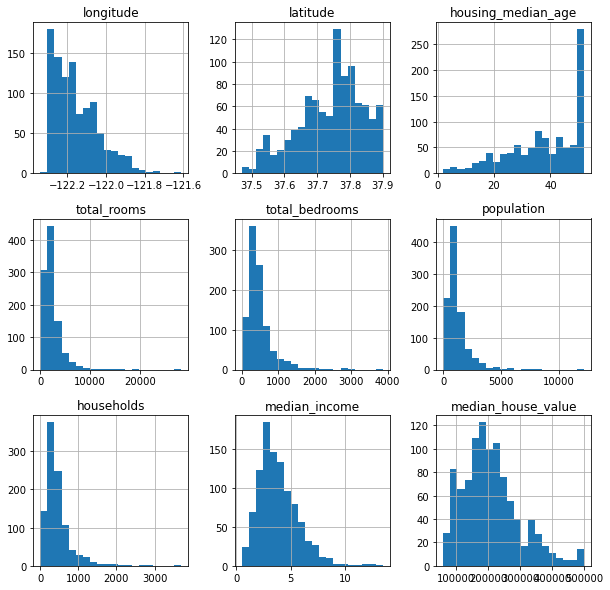

In [53]:
housing.hist(figsize = (10,10),bins = 20)
plt.show()

Nasza zmienna celu czyli median_haouse_value została ucięta do wartości 500000 dlatego jej rozkład ma pik w tym miejscu.

In [54]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           1000 non-null   float64
 1   latitude            1000 non-null   float64
 2   housing_median_age  1000 non-null   float64
 3   total_rooms         1000 non-null   float64
 4   total_bedrooms      994 non-null    float64
 5   population          1000 non-null   float64
 6   households          1000 non-null   float64
 7   median_income       1000 non-null   float64
 8   median_house_value  1000 non-null   float64
 9   ocean_proximity     1000 non-null   object 
dtypes: float64(9), object(1)
memory usage: 78.2+ KB


Tylko zmienna total_bedrooms posiada braki. Uzupełnijmy je medianą z tej zmiennej ponieważ średnia byłaby zależna mocno od outlierów.

In [55]:
import statistics
housing['total_bedrooms']=housing['total_bedrooms'].fillna(statistics.median(housing['total_bedrooms']))
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           1000 non-null   float64
 1   latitude            1000 non-null   float64
 2   housing_median_age  1000 non-null   float64
 3   total_rooms         1000 non-null   float64
 4   total_bedrooms      1000 non-null   float64
 5   population          1000 non-null   float64
 6   households          1000 non-null   float64
 7   median_income       1000 non-null   float64
 8   median_house_value  1000 non-null   float64
 9   ocean_proximity     1000 non-null   object 
dtypes: float64(9), object(1)
memory usage: 78.2+ KB


In [56]:
from category_encoders import OneHotEncoder
encoder=OneHotEncoder(cols=['ocean_proximity'])
housing=encoder.fit_transform(housing)

C:\Users\klgru\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


## Skalowanie zmiennych

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 

In [62]:
import numpy as np
from sklearn.model_selection import train_test_split
y = np.array(apartments['m2.price'])
X = apartments.drop(['m2.price'],axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.3)


In [63]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
model_svr = SVR()
model_svr.fit(X_train,y_train)
print("Dane bez skalowania")
print("Wartość MSE (train): ",mean_squared_error(y_train,model_svr.predict(X_train),squared=False))
print("Wartość MSE (test): ",mean_squared_error(y_test,model_svr.predict(X_test),squared=False))

Dane bez skalowania
Wartość MSE (train):  911.4355168381151
Wartość MSE (test):  957.1122021293028


In [64]:
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(scaler,SVR())

In [65]:
pipeline.fit(X_train,y_train)
print("Dane z skalowaniem")
print("Wartość MSE (train): ",mean_squared_error(y_train,pipeline.predict(X_train),squared=False))
print("Wartość MSE (test): ",mean_squared_error(y_test,pipeline.predict(X_test),squared=False))

Dane z skalowaniem
Wartość MSE (train):  890.0117979866849
Wartość MSE (test):  934.97032396136


Na danych apartments skalowanie poprawiło wynik, czyli zmniejszyło średnią wartość błędu średniokwadratowego dla danych. Poprawiło wyniki i dla danych testowych i treningowych.

### California Housing Prices

In [74]:
y_1 = np.array(housing['median_house_value'])
X_1 = housing.drop(['median_house_value'],axis=1)

X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(X_1, y_1, test_size=0.3)
X_val_1, X_test_1, y_val_1, y_test_1 = train_test_split(X_val_1, y_val_1, test_size=0.3)

In [75]:
model_svr_1 = SVR()
model_svr_1.fit(X_train_1,y_train_1)
print("Dane bez skalowania")
print("Wartość MSE (train): ",mean_squared_error(y_train_1,model_svr_1.predict(X_train_1),squared=False))
print("Wartość MSE (test): ",mean_squared_error(y_test_1,model_svr_1.predict(X_test_1),squared=False))

Dane bez skalowania
Wartość MSE (train):  88175.78542588312
Wartość MSE (test):  89361.91934593623


In [76]:
pipeline_1 = make_pipeline(scaler,SVR())

In [77]:
pipeline_1.fit(X_train_1,y_train_1)
print("Dane z skalowaniem")
print("Wartość MSE (train): ",mean_squared_error(y_train_1,pipeline_1.predict(X_train_1),squared=False))
print("Wartość MSE (test): ",mean_squared_error(y_test_1,pipeline_1.predict(X_test_1),squared=False))

Dane z skalowaniem
Wartość MSE (train):  88160.53894408891
Wartość MSE (test):  89342.52248730666


W tym wypadku skalowanie również poprawiło wyniki, choć poprawa ta nie jest zbyt duża.

## Random Search

In [78]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'svr', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'svr__C', 'svr__cache_size', 'svr__coef0', 'svr__degree', 'svr__epsilon', 'svr__gamma', 'svr__kernel', 'svr__max_iter', 'svr__shrinking', 'svr__tol', 'svr__verbose'])

In [79]:
from sklearn.model_selection import RandomizedSearchCV
space = dict()
space['C'] = np.arange(1,1000,1)
space['gamma'] = ['scale', 'auto']
space['degree'] = np.arange(1,10,1)

search = RandomizedSearchCV(model_svr, space, n_iter=100, scoring='neg_mean_squared_error', n_jobs=-1, random_state=1)
result = search.fit(X_train, y_train)
print('Najlepsze wyniki: %s' % result.best_params_)


Najlepsze wyniki: {'gamma': 'auto', 'degree': 5, 'C': 961}


In [80]:
model = SVR(gamma='auto',degree = 5,C=961)
pipeline_best = make_pipeline(scaler,model)
pipeline_best.fit(X_train,y_train)
print("Dane z skalowaniem")
print("Wartość MSE (train): ",mean_squared_error(y_train,pipeline_best.predict(X_train),squared=False))
print("Wartość MSE (test): ",mean_squared_error(y_test,pipeline_best.predict(X_test),squared=False))

Dane z skalowaniem
Wartość MSE (train):  140.75658172380446
Wartość MSE (test):  206.42609808142035


Wyniki są zdecydowanie lepsze, strojenie hiperparametrów poprawiło znacząco model.

In [81]:
search = RandomizedSearchCV(SVR(), space, n_iter=10, scoring='neg_mean_squared_error', n_jobs=-1, random_state=1)
result = search.fit(X_train_1, y_train_1)
print('Najlepsze wyniki: %s' % result.best_params_)


Najlepsze wyniki: {'gamma': 'scale', 'degree': 4, 'C': 908}


In [82]:
model = SVR(gamma='scale',degree = 4,C=908)
pipeline_best_1 = make_pipeline(scaler,model)
pipeline_best_1.fit(X_train_1,y_train_1)
print("Dane z skalowaniem")
print("Wartość MSE (train): ",mean_squared_error(y_train_1,pipeline_best_1.predict(X_train_1),squared=False))
print("Wartość MSE (test): ",mean_squared_error(y_test_1,pipeline_best_1.predict(X_test_1),squared=False))

Dane z skalowaniem
Wartość MSE (train):  70988.24285606043
Wartość MSE (test):  70448.11857965936


W tym przypadku strojenie poprwiło wyniki ale nie tak znacząco jak przy danych apartments.

## Zadanie bonusowe

In [20]:
allegro = pd.read_csv('allegro-api-transactions.csv')
allegro.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,"Odzież, Obuwie, Dodatki"


In [21]:
allegro_df = allegro[['price','it_location','main_category','categories']]
allegro_df.head()

,price,it_location,main_category,categories
0,59.99,Warszawa,Komputery,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No..."
1,4.90,Warszawa,"Odzież, Obuwie, Dodatki","['Odzież, Obuwie, Dodatki', 'Bielizna damska',..."
2,109.90,Leszno,Dom i Ogród,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc..."
3,18.50,Wola Krzysztoporska,Książki i Komiksy,"['Książki i Komiksy', 'Poradniki i albumy', 'Z..."
4,19.90,BIAŁYSTOK,"Odzież, Obuwie, Dodatki","['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '..."


In [22]:
allegro_df['it_location'].value_counts()

Warszawa                              23244
Kraków                                15135
Łódź                                  10935
Poznań                                10610
Wrocław                                8646
                                      ...  
Pruszcz GD Cieplewo Rusocin Łęgowo        1
Śmieszkowo                                1
KOSAKOWO                                  1
OCHODZE                                   1
CHODECZ                                   1
Name: it_location, Length: 10056, dtype: int64

In [23]:
allegro_df[["it_location"]] = allegro_df[["it_location"]].apply(lambda x: x.astype(str).str.lower())
allegro_df[["it_location"]].head()

C:\Users\klgru\Anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,it_location
0,warszawa
1,warszawa
2,leszno
3,wola krzysztoporska
4,białystok


In [24]:
allegro_df['it_location'].value_counts()

warszawa                          27042
kraków                            16581
łódź                              12433
poznań                            11197
internet                          10992
                                  ...  
tęgoborze                             1
izabelin-laski                        1
warszawa ul targowa66 pasaż 32        1
kapino                                1
przecław k/szczecina                  1
Name: it_location, Length: 7903, dtype: int64

Zmiejszenie wszystkich liter na małe spowodowało, że unikalne wartości zmiennej it_location zmnieszyły się o około 2 tys.

In [43]:
allegro_df['main_category'].value_counts()

Dom i Ogród                            91042
Odzież, Obuwie, Dodatki                54257
Motoryzacja                            45941
Dla Dzieci                             42107
Uroda                                  28096
Sport i Turystyka                      27532
RTV i AGD                              20341
Telefony i Akcesoria                   19805
Komputery                              14491
Zdrowie                                13166
Książki i Komiksy                      11572
Delikatesy                              8074
Gry                                     7150
Rękodzieło                              6574
Kolekcje                                6146
Przemysł                                5959
Biżuteria i Zegarki                     5808
Biuro i Reklama                         3194
Fotografia                              2381
Muzyka                                  1961
Antyki i Sztuka                         1214
Konsole i automaty                      1053
Filmy     

In [25]:
import numpy as np
from sklearn.model_selection import train_test_split
y = np.array(allegro_df['price'])
X = allegro_df.drop(['price'],axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.3)

In [26]:
from category_encoders import TargetEncoder
encoder_1=TargetEncoder()
encoder_2= TargetEncoder(smoothing = 100)
encoder_3 = TargetEncoder(smoothing = 10000)

### Model liniowy

In [30]:
from sklearn import  linear_model
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

regr = linear_model.LinearRegression()

pipeline_1 = make_pipeline(encoder_1,regr)
pipeline_2 = make_pipeline(encoder_2,regr)
pipeline_3 = make_pipeline(encoder_3,regr)

pipeline_1.fit(X_train, y_train)
pipeline_2.fit(X_train,y_train)
pipeline_3.fit(X_train,y_train)

y_pred_1 = pipeline_1.predict(X_train)
y_pred_test_1 = pipeline_1.predict(X_test)
print("Smoothing domyślny")
print("Wartość MSE (train): ",mean_squared_error(y_train,y_pred_1,squared=False))
print("Wartość MSE (test): ",mean_squared_error(y_test,y_pred_test_1,squared=False))
print("Wartość R2 (train): ",r2_score(y_train,y_pred_1))
print("Wartość R2 (test): ",r2_score(y_test,y_pred_test_1))

y_pred_2 = pipeline_2.predict(X_train)
y_pred_test_2 = pipeline_2.predict(X_test)
print("Smoothing = 100")
print("Wartość MSE (train): ",mean_squared_error(y_train,y_pred_2,squared=False))
print("Wartość MSE (test): ",mean_squared_error(y_test,y_pred_test_2,squared=False))
print("Wartość R2 (train): ",r2_score(y_train,y_pred_2))
print("Wartość R2 (test): ",r2_score(y_test,y_pred_test_2))

y_pred_3 = pipeline_3.predict(X_train)
y_pred_test_3 = pipeline_3.predict(X_test)
print("Smoothing = 10000")
print("Wartość MSE (train): ",mean_squared_error(y_train,y_pred_3,squared=False))
print("Wartość MSE (test): ",mean_squared_error(y_test,y_pred_test_3,squared=False))
print("Wartość R2 (train): ",r2_score(y_train,y_pred_3))
print("Wartość R2 (test): ",r2_score(y_test,y_pred_test_3))

C:\Users\klgru\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\klgru\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\klgru\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Smoothing domyślny
Wartość MSE (train):  362.1488797661817
Wartość MSE (test):  238.1647486858921
Wartość R2 (train):  0.07162507700367193
Wartość R2 (test):  -0.058483668992814763
Smoothing = 100
Wartość MSE (train):  337.09060037974615
Wartość MSE (test):  202.9952844060955
Wartość R2 (train):  0.19565494942109551
Wartość R2 (test):  0.23104469308457032
Smoothing = 10000
Wartość MSE (train):  327.656329542003
Wartość MSE (test):  188.31707769986585
Wartość R2 (train):  0.24004787723135634
Wartość R2 (test):  0.3382276582258713


Przetestowałam kilka wartości dla parametru smoothing. Najlepsze wyniki otrzymujemy dla największej podanej przez mnie wartości tego parametru. 

Target encoding korzysta z metody, w której uśrednia się wartość celu dla danej kategorii. (Grupuje się kategorie i liczy średnią dla zmiennej celu)


Parametr smoothing czyli wygładzanie addytywne polega na tym aby przy małej liczności próbki nie kierować sie średnią lokalną, która jest bardzo podatna na wartości odstające, tylko średnią globalną która jest bardziej "wygładzona". W tym parametrze ustawiamy ile wartości jest potrzebnych aby przejść na korzystanie z średniej lokalnej.(Poniżej tej wartości korzystamy z średniej globalnej, powyżej z średniej lokalnej. Jest to ważne w naszym zbiorze ponieważ w naszych danych mamy dużo kategorii o małej liczności.

### Regularyzacja

Metody Ridge i Lasso są to techniki, które powinny zapobiegac przeuczaniu się modelu.

In [36]:
from sklearn.linear_model import Ridge
ridge = clf = Ridge()
pipeline_ridge = make_pipeline(encoder,ridge)
pipeline_ridge.fit(X_train, y_train)
y_pred_ridge = pipeline_ridge.predict(X_train)
y_pred_test_ridge = pipeline_ridge.predict(X_test)

print("Wartość MSE (train): ",mean_squared_error(y_train,y_pred_ridge,squared=False))
print("Wartość MSE (test): ",mean_squared_error(y_test,y_pred_test_ridge,squared=False))
print("Wartość R2 (train): ",r2_score(y_train,y_pred_ridge))
print("Wartość R2 (test): ",r2_score(y_test,y_pred_test_ridge))

C:\Users\klgru\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Wartość MSE (train):  329.8534971763815
Wartość MSE (test):  189.3486780912227
Wartość R2 (train):  0.2298216709382238
Wartość R2 (test):  0.33095742562406016


Ridge jest to model regresji liniowej, który korzysta z funkcji straty najmniejszych kwadrwatów z regularyzacją za pomocą normy I2. Ze strony https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b z której korzystam do nauki LAsso i Ridge pochodzą poniższe wzory.

W Ridge korzystamy z kwadratów współczynników.

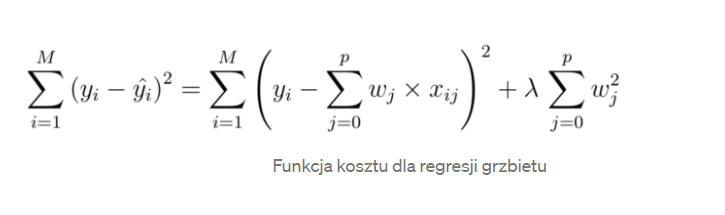

In [41]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.1)
pipeline_lasso = make_pipeline(encoder,lasso)
pipeline_lasso.fit(X_train,y_train)
y_pred_lasso = pipeline_lasso.predict(X_train)
y_pred_test_lasso = pipeline_lasso.predict(X_test)

print("Wartość MSE (train): ",mean_squared_error(y_train,y_pred_lasso,squared=False))
print("Wartość MSE (test): ",mean_squared_error(y_test,y_pred_test_lasso,squared=False))
print("Wartość R2 (train): ",r2_score(y_train,y_pred_lasso))
print("Wartość R2 (test): ",r2_score(y_test,y_pred_test_lasso))

C:\Users\klgru\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Wartość MSE (train):  329.85349719280526
Wartość MSE (test):  189.34858862358524
Wartość R2 (train):  0.22982167086152783
Wartość R2 (test):  0.3309580578718788


Lasso w odróżnieniu od Ridge korzysta z normy I1.

Czyli zamiast kwadratów współczynników korzystamy z wartości bezwzględnej.

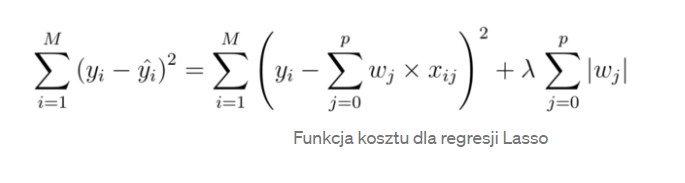

Ridge i Lasso mają do siebie bardzo zbliżone wyniki. Można nawet powiedzieć, że z dokładnością do części tysięcznych są takie same.

### Inny model regresyjny

In [35]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
pipeline_4 = make_pipeline(encoder,rf)
pipeline_4.fit(X_train,y_train)

y_pred_4 = pipeline_4.predict(X_train)
y_pred_test_4 = pipeline_4.predict(X_test)
print("Wartość MSE (train): ",mean_squared_error(y_train,y_pred_4,squared=False))
print("Wartość MSE (test): ",mean_squared_error(y_test,y_pred_test_4,squared=False))
print("Wartość R2 (train): ",r2_score(y_train,y_pred_4))
print("Wartość R2 (test): ",r2_score(y_test,y_pred_test_4))

C:\Users\klgru\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Wartość MSE (train):  253.94125369770606
Wartość MSE (test):  296.0385546395782
Wartość R2 (train):  0.5435264399255517
Wartość R2 (test):  -0.6354066154649098


Las losowy  bez strojenia parametrów daje bardzo dobre wyniki, lepsze od modelu liniowego.